# Titanic 生存予測プロジェクト

## 1. データの読み込みと概要確認

ここでは、train.csv と test.csv を読み込み、データの概要を確認します。

In [ ]:
# 1. ライブラリのインポート
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2. データ読み込み
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
# 3. データの基本情報確認
print(train_df.head())
print(train_df.info())
print(train_df.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [4]:
# 4. 欠損値の確認
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## 2. データの可視化（EDA）

性別・クラス・年齢・家族構成・運賃などが生存に与える影響を可視化します。

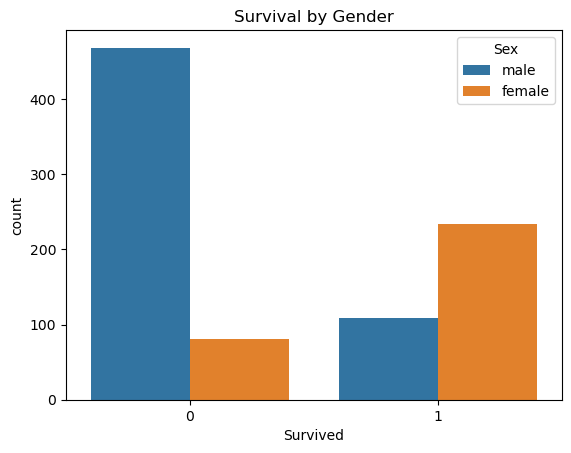

In [5]:
# 5. 可視化：性別と生存率
sns.countplot(x='Survived', hue='Sex', data=train_df)
plt.title('Survival by Gender')
plt.show()

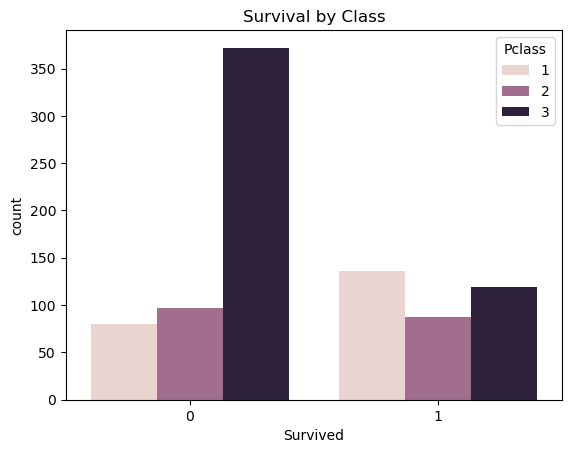

In [6]:
# 6. 可視化：Pclass（客室クラス）と生存率
sns.countplot(x='Survived', hue='Pclass', data=train_df)
plt.title('Survival by Class')
plt.show()

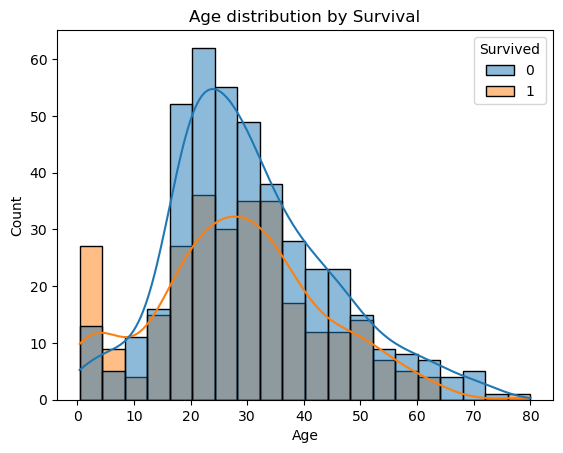

In [7]:
# 7. 可視化：年齢（Age）と生存の関係
sns.histplot(data=train_df, x='Age', hue='Survived', bins=20, kde=True)
plt.title("Age distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

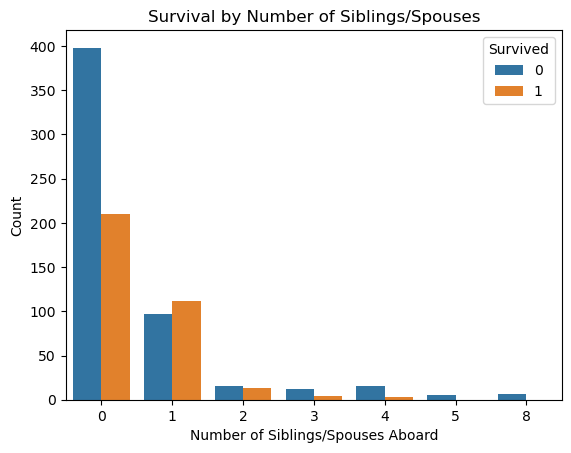

In [8]:
# 8. 兄弟・配偶者の有無（SibSp）と生存の関係
sns.countplot(x='SibSp', hue='Survived', data=train_df)
plt.title("Survival by Number of Siblings/Spouses")
plt.xlabel("Number of Siblings/Spouses Aboard")
plt.ylabel("Count")
plt.show()

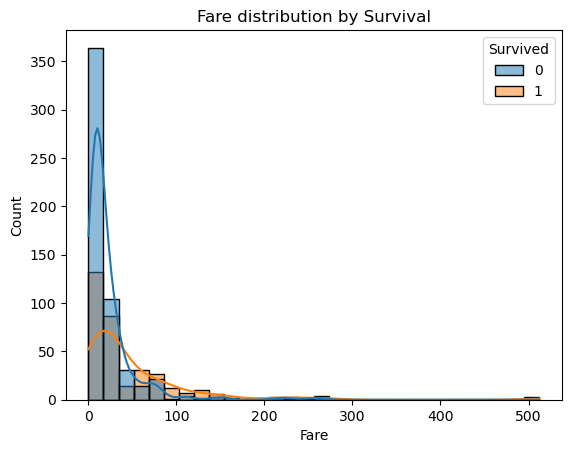

In [9]:
# 9. 運賃（Fare）と生存の関係
sns.histplot(data=train_df, x='Fare', hue='Survived', bins=30, kde=True)
plt.title("Fare distribution by Survival")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()


## 3. データ前処理

欠損値の補完、カテゴリ変換、特徴量作成（FamilySize）を行います。

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# データのコピー（元データ保護）
train = train_df.copy()
test = test_df.copy()

# 【1】欠損値の補完（Age, Fare）
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

# 【2】Embarked の欠損補完
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

# 【3】カテゴリ変換
for df in [train, test]:
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [19]:
# 1. 説明変数（特徴量）として使う列を指定
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

X = train[features]     # 説明変数（入力データ）
y = train['Survived']   # 目的変数（正解ラベル）

# 2. モデルを作成して学習
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# 3. テストデータに対して予測
X_test = test[features]
predictions = model.predict(X_test)

# 4. 提出ファイルを作成
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': predictions
})
submission.to_csv('submission.csv', index=False)


## 4. モデル構築と比較

ロジスティック回帰、ランダムフォレスト、XGBoostの順に精度を比較します。

In [20]:
from sklearn.linear_model import LogisticRegression

# 特徴量の追加：家族の人数
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

# 使う特徴量を定義（FamilySize を追加！）
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize']

# 学習データと正解ラベルに分ける
X = train[features]
y = train['Survived']

# モデルの作成と学習
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# テストデータに対して予測
X_test = test[features]
predictions = model.predict(X_test)

# 提出用ファイルの作成
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': predictions
})
submission.to_csv('submission.csv', index=False)


In [21]:
# submission.csv を作成し直して上書き保存
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': predictions
})
submission.to_csv('submission.csv', index=False)

# 中身を確認（Notebookで表示）
submission.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [22]:
from sklearn.ensemble import RandomForestClassifier

# モデルをRandomForestに変更して学習
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X, y)

# 予測
predictions = model.predict(X_test)

# 提出ファイル作成＆保存
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': predictions
})
submission.to_csv('submission.csv', index=False)

# 中身を確認
submission.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [23]:
!pip install xgboost

In [24]:
from xgboost import XGBClassifier

# モデルをXGBoostに変更して学習
model = XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
model.fit(X, y)

# 予測
predictions = model.predict(X_test)

# 提出ファイル作成＆保存
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': predictions
})
submission.to_csv('submission.csv', index=False)

# 中身確認
submission.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [25]:
model = XGBClassifier(
    n_estimators=300,     # 木の数（大きくすると精度上がる可能性）
    max_depth=4,          # 木の深さ（3〜6あたりがよく効く）
    learning_rate=0.05,   # 学習率（0.05〜0.1）
    subsample=0.8,        # データのサブサンプル比
    colsample_bytree=0.8, # 特徴量のサブサンプル比
    random_state=42
)


## 5. 結果と考察

- ロジスティック回帰のKaggleスコア：0.76555  
- ランダムフォレストのスコア：**0.77990（ベスト）**  
- XGBoostはパラメータを調整しても改善せず、最終的にはRandomForestを採用

### 💡 考察ポイント

- ランダムフォレストは非線形な関係やカテゴリ変数をうまく処理できたため、他モデルより精度が良かったと考えられる。
- FamilySize（家族人数）を追加したが、目立った改善は見られず冗長な可能性あり。
- 試行錯誤のプロセスを通じて、機械学習モデルの比較と評価の重要性を実感した。